# Business Problem Understanding

## Context

Daegu Merupakan salah satu kota metropolitan di Korea Selatan, memiliki populasi 2.4 juta jiwa membuat Daegu menjadi kota dengan populasi terbesar ke 4 setelah Seoul, Busan dan Incheon (https://www.worldometers.info/world-population/south-korea-population/) (https://www.daegu.go.kr/english/index.do?menu_id=00939612). Apartemen menempati sekitar 75% dari total transaksi perumahan dalam setahun, yang merupakan ruang hidup representatif bagi sebagian besar warga(https://journal.khousing.or.kr/articles/article/NGwa/). Hal ini disebabkan karena terbatasnya lahan yang tersedia di Korea Selatan, membuat pengembang properti membangun propertinya tinggi ke atas. Pasar properti di Daegu, khususnya apartemen mengalami pertumbuhan yang signifikan seiring dengan meningkatnya urbanisasi dan permintaan akan hunian yang nyaman dan modern. Namun, dengan meningkatnya persaingan, penting bagi pengembang properti dan pemilik apartemen untuk memahami dinamika pasar dan preferensi pelanggan.

## Problem Statement

Para agen properti di Daegu menghadapi tantangan dalam menentukan harga sewa dan jual yang kompetitif serta memahami faktor-faktor yang mempengaruhi permintaan dan penawaran. Tanpa pemahaman yang mendalam tentang tren pasar, preferensi penyewa/pembeli, dan harga pasar yang tepat, mereka berisiko kehilangan potensi keuntungan dan mengalami kesulitan dalam menarik pelanggan. Oleh karena itu dibutuhkan model untuk memprediksi harga yang sesuai agar agen properti dapat dengan mudah menentukan harga dan memenuhi target penjualan.

## Goals

Berdasarkan permasalahan tersebut, para agen properti memerlukan model yang dapat memprediksi harga pasaran yang sesuai dengan fasilitas yang diberikan oleh setiap apartemen. Model ini harus dibuat sebaik mungkin berdasarkan berbagai parameter seperti lokasi, ukuran, fasilitas, dan kondisi pasar. Dengan demikian para agen properti dapat menentukan harga sewa/jual yang lebih kompetitif, dan memberikan kepuasan terhadap penyewa/pembeli.

## Analytic Approach

Jadi yang akan dilakukan adalah menganalisis data untuk menemukan pola dari fitur-fitur yang tersedia yang akan membedakan satu apartemen dengan apartemen lainnya. Kemudian membuat suatu model regresi yang akan membantu para agen properti untuk menentukan harga sewa/jual apartemen yang sesuai dengan fitur-fiturnya.

## Metric Evaluation

Evaluasi metric yang akan digunakan adalah :

- MAE : Mean Absolute Error. Mengukur rata-rata kesalahan absolut antara harga prediksi dengan harga aktual untuk mengukur akurasi model prediksi. Semakin nilai MAE mendekati 0 atau semakin kecil nilai MAE, hasilnya akan semakin bagus.
- RMSE : Root Mean Squared Error. Mengukur akar kuadrat dari rata-rata kesalahan kuadrat untuk memberikan penalti lebih besar pada kesalahan yang lebih besar. Semakin nilai RMSE mendekati 0 atau semakin kecil nilai RMSE hasilnya akan semakin bagus.
- MAPE : Mean Absolute Percentage Error. Mengukur kesalahan prediksi dalam bentuk persentase dari nilai aktual. Semakin kecil presentase MAPE semakin bagus juga hasilnya.
- R-square : Menilai proporsi variansi dalam data harga yang dapat dijelaskan oleh model. Semakin nilai R-square mendekati 1 semakin bagus modelnya

K-fold cross validation juga digunakan sebagai metode evaluasi performa model yang dilakukan dengan membagi dataset menjadi 5 partisi yang sama besar lalu model akan dilatih pada 4 partisi dan diuji pada partisi yang tersisa. Prosedur ini akan dilakukan sebanyak 5 kali dengan partisi yang berbeda-beda sebagai data validasi dan data training sehingga akhirnya performa model akan dihitung berdasarkan rata-rata performa. Metode ini berguna untuk menghindari overfitting atau underfitting dan untuk mendapatkan generalisasi model yang lebih baik.

# EDA

In [208]:
# Import Library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Statistics
from scipy.stats import skew
from scipy.stats import normaltest

# Train Test Split
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

# Preprocessing
import category_encoders as ce
from category_encoders import BinaryEncoder, OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler

# ML Algorithm
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.svm import SVR
import xgboost as xgb

# Evaluation
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Save model
import pickle

import warnings
warnings.filterwarnings('ignore')

In [209]:
data = pd.read_csv('/content/data_daegu_apartment.csv')
data.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| HallwayType | Object | Apartment type |
| TimeToSubway | Object | Time needed to the nearest subway station |
| SubwayStation | Object | The name of the nearest subway station |
| N_FacilitiesNearBy(ETC) | Float | The number of facilities nearby |
| N_FacilitiesNearBy(PublicOffice) | Float | The number of public office facilities nearby |
| N_SchoolNearBy(University) | Float | The number of universities nearby |
| N_Parkinglot(Basement) | Float | The number of the parking lot |
| YearBuilt | Integer | The year the apartment was built |
| N_FacilitiesInApt | Integer | Number of facilities in the apartment |
| Size(sqf)	| Integer | The apartment size (in square feet) |
| SalePrice | Integer | The apartment price (Won) |


In [210]:
# Mengubah nama kolom agar memudahkan analisis

data.rename(columns={'N_FacilitiesNearBy(ETC)' : 'ETC_Facilities_Nearby',
                     'N_FacilitiesNearBy(PublicOffice)' : 'Public_Office_Nearby',
                     'N_SchoolNearBy(University)' : 'University_Nearby',
                     'N_Parkinglot(Basement)' : 'Parking_Basement',
                     'N_FacilitiesInApt' : 'Apt_Facilities',
                     'Size(sqf)' : 'Size',
                     'SalePrice' : 'Price'}, inplace=True)

In [211]:
data['TimeToSubway'].unique()

array(['0-5min', '10min~15min', '15min~20min', '5min~10min',
       'no_bus_stop_nearby'], dtype=object)

In [212]:
# Mengubah kategori pada kolom TimeToSubway agar seragam

data.loc[data['TimeToSubway']=='0-5min','TimeToSubway']='0 - 5 min'
data.loc[data['TimeToSubway']=='5min~10min','TimeToSubway']='5 - 10 min'
data.loc[data['TimeToSubway']=='10min~15min','TimeToSubway']='10 - 15 min'
data.loc[data['TimeToSubway']=='15min~20min','TimeToSubway']='15 - 20 min'
data.loc[data['TimeToSubway']=='no_bus_stop_nearby', 'TimeToSubway']='None'

In [213]:
data

,HallwayType,TimeToSubway,SubwayStation,ETC_Facilities_Nearby,Public_Office_Nearby,University_Nearby,Parking_Basement,YearBuilt,Apt_Facilities,Size,Price
0,terraced,0 - 5 min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10 - 15 min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15 - 20 min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5 - 10 min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0 - 5 min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504
...,...,...,...,...,...,...,...,...,...,...,...
4118,terraced,0 - 5 min,Sin-nam,0.0,3.0,2.0,475.0,2008,8,914,323008
4119,mixed,15 - 20 min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1451,242477
4120,mixed,15 - 20 min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141
4121,corridor,5 - 10 min,Daegu,2.0,5.0,0.0,76.0,1985,3,676,73451


In [214]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   HallwayType            4123 non-null   object 
 1   TimeToSubway           4123 non-null   object 
 2   SubwayStation          4123 non-null   object 
 3   ETC_Facilities_Nearby  4123 non-null   float64
 4   Public_Office_Nearby   4123 non-null   float64
 5   University_Nearby      4123 non-null   float64
 6   Parking_Basement       4123 non-null   float64
 7   YearBuilt              4123 non-null   int64  
 8   Apt_Facilities         4123 non-null   int64  
 9   Size                   4123 non-null   int64  
 10  Price                  4123 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 354.4+ KB


In [215]:
# Cek missing value

data.isna().sum()

,0
HallwayType,0
TimeToSubway,0
SubwayStation,0
ETC_Facilities_Nearby,0
Public_Office_Nearby,0
University_Nearby,0
Parking_Basement,0
YearBuilt,0
Apt_Facilities,0
Size,0


In [216]:
# Cek duplicate

data.duplicated().sum()

1422

In [217]:
data[data.duplicated()]

,HallwayType,TimeToSubway,SubwayStation,ETC_Facilities_Nearby,Public_Office_Nearby,University_Nearby,Parking_Basement,YearBuilt,Apt_Facilities,Size,Price
55,terraced,0 - 5 min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,910,263345
56,terraced,0 - 5 min,Banwoldang,0.0,0.0,0.0,203.0,2014,10,914,371681
122,terraced,0 - 5 min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,644,149274
127,terraced,0 - 5 min,Banwoldang,0.0,2.0,2.0,524.0,2007,4,1394,256637
133,mixed,15 - 20 min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,644,168141
...,...,...,...,...,...,...,...,...,...,...,...
4113,terraced,5 - 10 min,Daegu,0.0,3.0,2.0,400.0,2015,7,644,300884
4114,corridor,10 - 15 min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,86725
4115,mixed,15 - 20 min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141
4120,mixed,15 - 20 min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141


In [218]:
data.drop_duplicates(inplace=True)

In [219]:
data

,HallwayType,TimeToSubway,SubwayStation,ETC_Facilities_Nearby,Public_Office_Nearby,University_Nearby,Parking_Basement,YearBuilt,Apt_Facilities,Size,Price
0,terraced,0 - 5 min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10 - 15 min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15 - 20 min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5 - 10 min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0 - 5 min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504
...,...,...,...,...,...,...,...,...,...,...,...
4116,terraced,0 - 5 min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,818,290265
4117,mixed,15 - 20 min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,345132
4118,terraced,0 - 5 min,Sin-nam,0.0,3.0,2.0,475.0,2008,8,914,323008
4119,mixed,15 - 20 min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1451,242477


In [220]:
# Cek outliers

def cek_outliers(data):
    outliers = {}
    for col in data.columns:
        if data[col].dtype in ['int64', 'float64']:
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3-Q1
            lower_bound = Q1-1.5*IQR
            upper_bound = Q3+1.5*IQR
            outliers[col] = len(data[(data[col]<lower_bound) | (data[col]>upper_bound)])
    return outliers

outliers = cek_outliers(data)

results = []
for col, count in outliers.items():
  results.append({'Column': col, 'Outliers total': count})

outliers_data = pd.DataFrame(results)
display(outliers_data)

,Column,Outliers total
0,ETC_Facilities_Nearby,0
1,Public_Office_Nearby,0
2,University_Nearby,0
3,Parking_Basement,0
4,YearBuilt,0
5,Apt_Facilities,0
6,Size,84
7,Price,17


## Statistics Summary

In [221]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ETC_Facilities_Nearby,2701.0,1.890411,2.153168,0.0,0.0,1.0,5.0,5.0
Public_Office_Nearby,2701.0,4.027027,1.887486,0.0,3.0,4.0,5.0,7.0
University_Nearby,2701.0,2.680489,1.504470,0.0,2.0,2.0,4.0,5.0
Parking_Basement,2701.0,533.746390,418.224859,0.0,181.0,536.0,798.0,1321.0
YearBuilt,2701.0,2002.358386,9.151949,1978.0,1993.0,2006.0,2007.0,2015.0
Apt_Facilities,2701.0,5.713439,2.386552,1.0,4.0,5.0,7.0,10.0
Size,2701.0,984.028878,391.982619,135.0,743.0,910.0,1167.0,2337.0
Price,2701.0,229511.365790,105079.891321,32743.0,153539.0,221238.0,300884.0,585840.0


In [222]:
data.describe(include='object').T

,count,unique,top,freq
HallwayType,2701,3,terraced,1667
TimeToSubway,2701,5,0 - 5 min,1248
SubwayStation,2701,8,Myung-duk,709


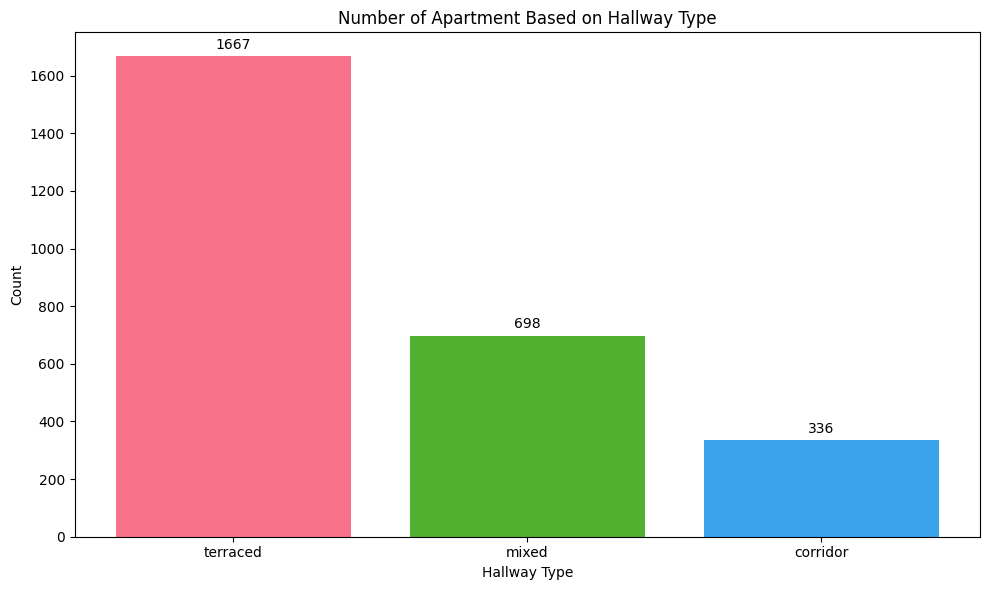

In [223]:
# Jumlah data pada masing-masing kategori pada kolom HallwayType

hallway = data['HallwayType'].value_counts()

# Visualisasinya
plt.figure(figsize=(10, 6))
palette = sns.color_palette("husl", len(hallway))
bars = plt.bar(hallway.index, hallway, color=palette)
plt.xlabel('Hallway Type')
plt.ylabel('Count')
plt.title('Number of Apartment Based on Hallway Type')

# Menambahkan Anotasi pada Barplot
for bar in bars:
    yval = bar.get_height()
    plt.annotate(str(yval), xy=(bar.get_x() + bar.get_width() / 2, yval),
                 xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

plt.tight_layout()
plt.show()

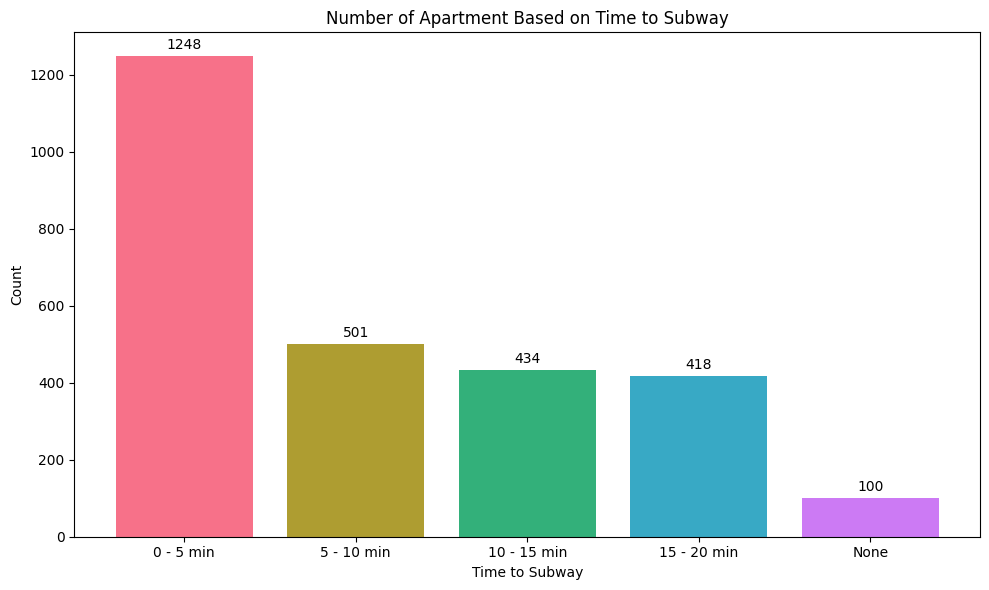

In [224]:
# Jumlah data pada masing-masing kategori pada kolom TimeToSubway

time = data['TimeToSubway'].value_counts()

# Visualisasinya
plt.figure(figsize=(10, 6))
palette = sns.color_palette("husl", len(time))
bars = plt.bar(time.index, time, color=palette)
plt.xlabel('Time to Subway')
plt.ylabel('Count')
plt.title('Number of Apartment Based on Time to Subway')

# Menambahkan Anotasi pada Barplot
for bar in bars:
    yval = bar.get_height()
    plt.annotate(str(yval), xy=(bar.get_x() + bar.get_width() / 2, yval),
                 xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

plt.tight_layout()
plt.show()

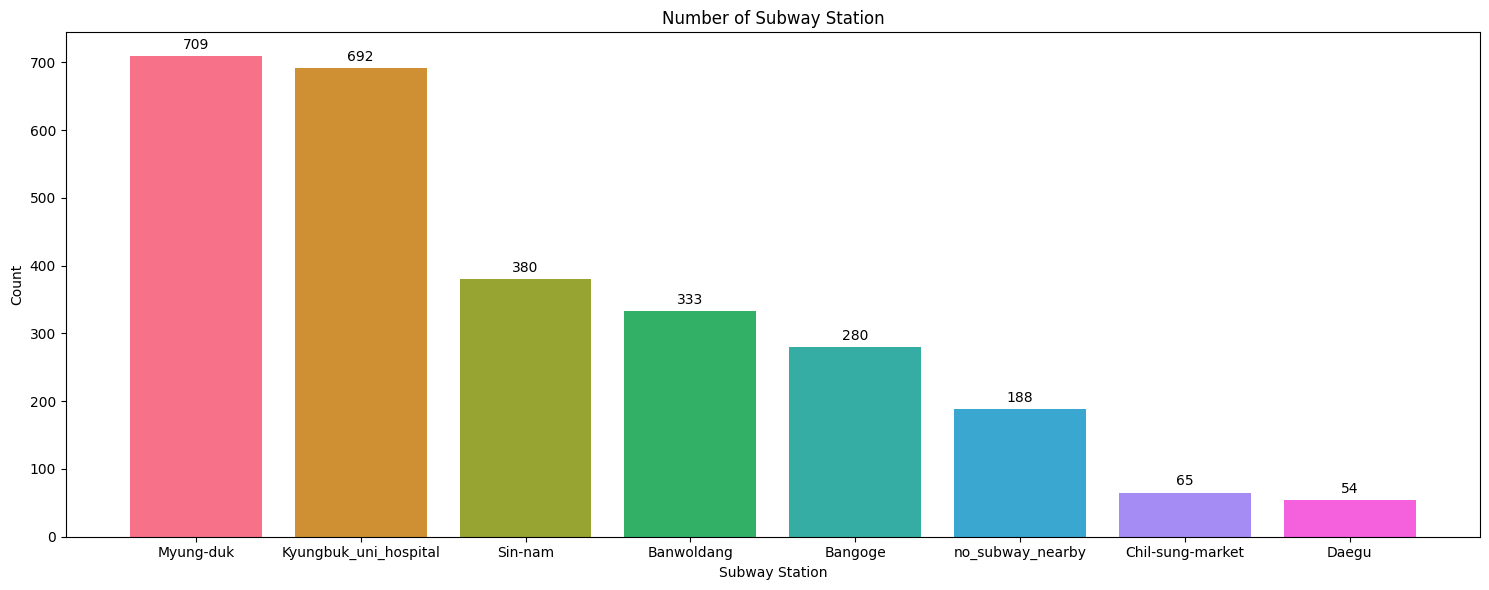

In [225]:
# Jumlah data pada masing-masing kategori pada kolom SubwayStation

subway = data['SubwayStation'].value_counts()

# Visualisasinya
plt.figure(figsize=(15, 6))
palette = sns.color_palette("husl", len(subway))
bars = plt.bar(subway.index, subway, color=palette)

# Memberikan Anotasi pada Barplot
for bar in bars:
    yval = bar.get_height()
    plt.annotate(str(yval), xy=(bar.get_x() + bar.get_width() / 2, yval),
                 xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

plt.xlabel('Subway Station')
plt.ylabel('Count')
plt.title('Number of Subway Station')
plt.tight_layout()
plt.show()

In [226]:
data['YearBuilt'].mode()

,YearBuilt
0,2007


In [227]:
data.groupby('YearBuilt')['HallwayType'].count()

,HallwayType
YearBuilt,
1978,44
1980,4
1985,41
1986,214
1992,221
1993,276
1997,58
2003,7
2005,280


Berdasarkan data yang telah ditampilkan diatas didapatkan beberapa informasi sebagai berikut:

- Data memiliki 11 kolom dan 4123 baris tanpa memiliki missing value.
- Terdapat 1422 data duplikat. Data di drop agar tidak terjadi overfitting.
- Terdapat outliers pada kolom Size dan Price namun tidak akan di drop karena outliers bukan disebabkan karena salah input data dan kesalahan pengukuran, namun berdasarkan domain knowledge outliers dianggap wajar karena sesuai statistik deskriptif harga mahal karena apartemen memiliki ukuran yang luas.
- Data numerikal :
  - Diskrit :
    - ETC_Facilities_Nearby
    - Public_Office_Nearby
    - University_Nearby
    - Parking_Basement
    - Apt_Facilities
  - Kontinyu :
    - YearBuilt
    - Size
    - Price
- Data Kategorikal :
  - Ordinal :
      - TimeToSubway
  - Nominal :
    - HallwayType
    - SubwayStation
- Apartemen di Daegu rata-rata memiliki 2 fasilitas, 4 public office, 3 university, dan 534 tempat parkir basement terdekat.
- Apartemen di Daegu paling banyak dibangun pada tahun 2007 dengan total 542 unit.
- Apartemen pertama di Daegu dalam data ini dibangun pada tahun 1978 dan yang terbaru dibangun pada tahun 2015.
- Rata-rata apartemen memiliki 6 fasilitas yang terbilang cukup banyak karena jumlah tebanyak fasilitas yang dimiliki apartemen adalah 10 fasilitas.
- Ukuran rata-rata apartemen di Daegu sebesar 984 sqf dengan ukuran paling kecil sebesar 135 sqf dan ukuran paling besar adalah 2337 sqf
- Harga rata-rata apartemen sebesar 229.511 won, dengan harga paling rendah 32.743 won dan harga paling tinggi adalah 585.840 won
- Terdapat 3 jenis apartemen di Daegu yaitu apartemen berteras, apartemen mixed sam dpartemen berkoridor. Terdapat 1667 unit apartemen berteras, 698 apartemen mixed dan 336 apartemen berkoridor.
- Sebanyak 1248 apartemen di Daegu terletak dekat dengan stasiun kereta karena hanya membutuhkan waktu tempuh selama 0 - 5 menit, 709 unit diantaranya paling dekat dengan stasiun Myung-duk dan 692 unit dekat dengan stasiun Kyungbuk Uni Hospital.


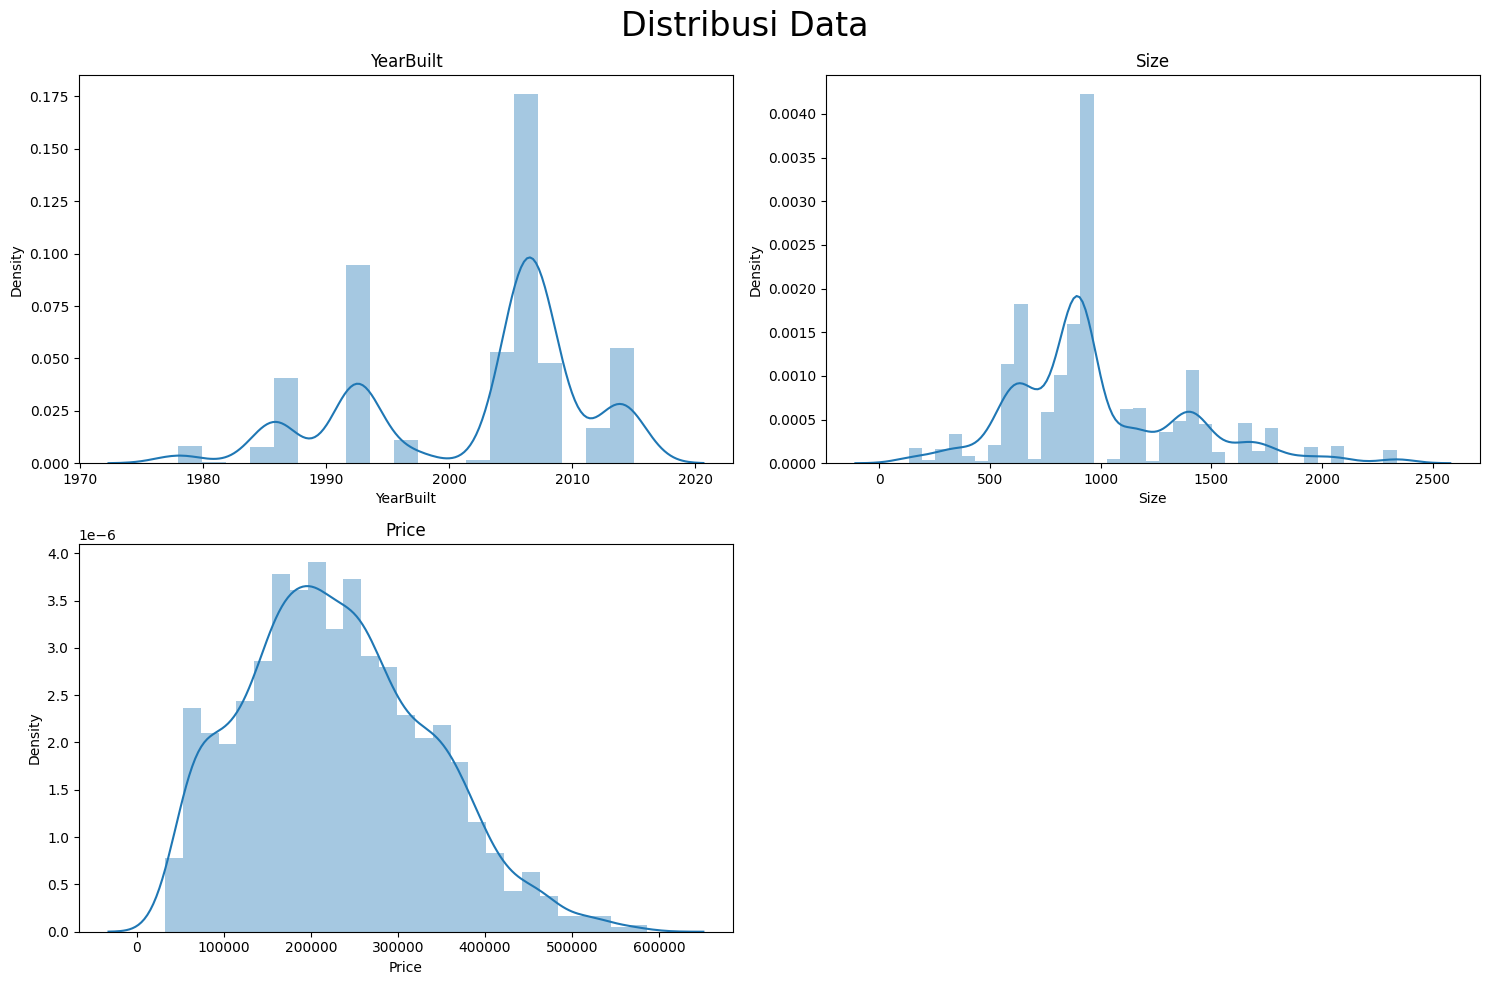

In [228]:
# Cek Distribusi data

plt.figure(figsize=(15,10))

columns=['YearBuilt','Size','Price']

plotnumber=1
for kolom in columns:
    plt.subplot(2,2,plotnumber)
    sns.distplot(data[kolom])
    plt.title(kolom)

    plotnumber +=1

plt.suptitle('Distribusi Data',size=24)
plt.tight_layout()
plt.show()

In [229]:
# Cek Skewness

hasil=[]
for i in columns:
    hasil=skew(data[columns])

pd.DataFrame({'Kolom':columns, 'Skewness':hasil})

,Kolom,Skewness
0,YearBuilt,-0.765522
1,Size,0.850927
2,Price,0.385870


In [230]:
# Cek Normalitas

column=['YearBuilt','Size','Price']

hasil=[]
for i in column:
    stats,pval=normaltest(data[i])
    if pval>0.05:
        hasil.append('Distribusi normal')
    else:
        hasil.append('Tidak terdistribusi normal')

pd.DataFrame({'Kolom':column, 'Distribusi':hasil})

,Kolom,Distribusi
0,YearBuilt,Tidak terdistribusi normal
1,Size,Tidak terdistribusi normal
2,Price,Tidak terdistribusi normal


- Kolom **YearBuilt, Size dan Price** memiliki data yang tidak terdistribusi normal
- Kolom **YearBuilt** memiliki angka skewness negatif yang berarti skewed ke kiri. Hal ini menunjukkan bahwa lebih banyak apartemen di Daegu yang dibangun pada tahun 2000 ke atas.
- Kolom **Size** memiliki angka skewness positif yang berarti skewed ke kanan. Hal ini menunjukkan bahwa ada sebagian besar apartemen di Daegu memiliki ukuran yang lebih kecil atau sedang, dengan beberapa outliers berupa apartemen yang sangat besar.
- Kolom **Price** memiliki angka skewnes positif `yang berarti skewed ke kanan. Hal ini menunjukkan bahwa sebagian besar apartemen berada di kisaran harga yang lebih rendah dengan beberapa outliers berupa apartemen yang memiliki harga yang sangat mahal.

## Correlation Matrix

In [231]:
# Cek Korelasi

korelasi = data.corr(method='spearman',numeric_only=True)
korelasi

,ETC_Facilities_Nearby,Public_Office_Nearby,University_Nearby,Parking_Basement,YearBuilt,Apt_Facilities,Size,Price
ETC_Facilities_Nearby,1.000000,0.719104,0.603146,-0.131327,-0.453372,-0.279411,-0.366269,-0.490961
Public_Office_Nearby,0.719104,1.000000,0.672793,-0.096519,-0.449821,-0.251487,-0.327316,-0.431966
University_Nearby,0.603146,0.672793,1.000000,0.201199,-0.235834,-0.055866,-0.284113,-0.295317
Parking_Basement,-0.131327,-0.096519,0.201199,1.000000,0.539013,0.769669,0.209004,0.528620
YearBuilt,-0.453372,-0.449821,-0.235834,0.539013,1.000000,0.634979,0.114345,0.561748
Apt_Facilities,-0.279411,-0.251487,-0.055866,0.769669,0.634979,1.000000,0.187586,0.587748
Size,-0.366269,-0.327316,-0.284113,0.209004,0.114345,0.187586,1.000000,0.654347
Price,-0.490961,-0.431966,-0.295317,0.528620,0.561748,0.587748,0.654347,1.000000


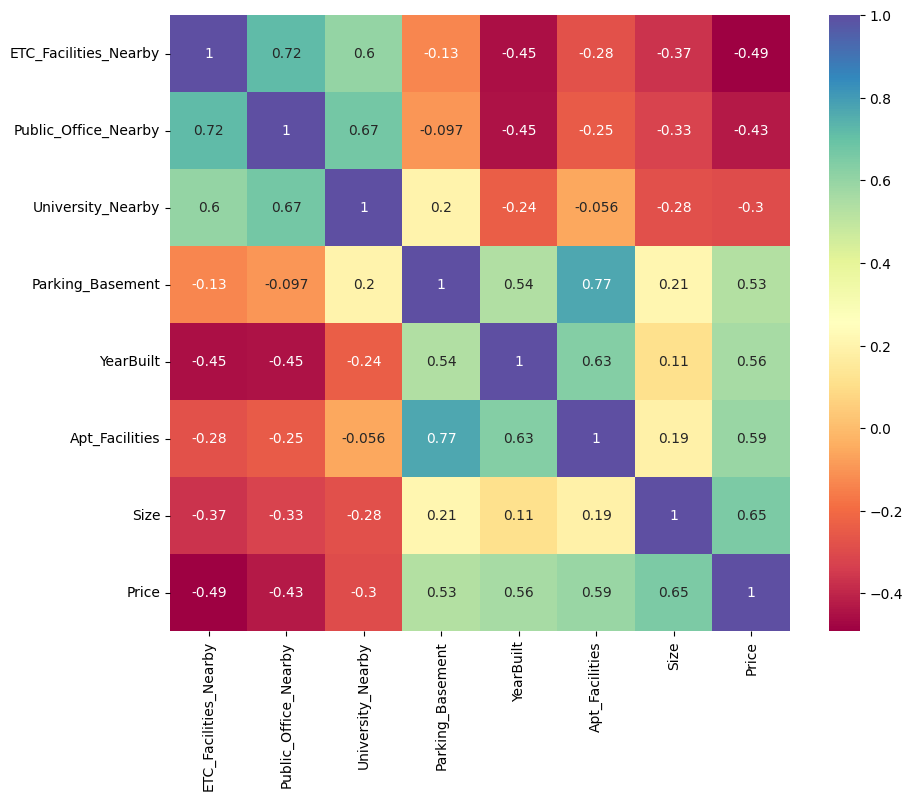

In [232]:
plt.figure(figsize=(10,8))
sns.heatmap(korelasi, annot=True, cmap='Spectral')
plt.show()

- Berdasarkan Correlation matrix tersebut, secara keseluruhan semua fitur menunjukkan **korelasi yang sedang** terhadap **Price** dengan rentang nilai 0.3 - 0.65.
- Fitur **Size, Apt_Facilities, YearBuilt,** dan **Parking_Basement** menunjukan **korelasi yang positif** terhadap **Price**. Variabel yang memiliki hubungan positif menunjukkan bahwa ketika satu variabel meningkat, variabel lain juga akan meningkat. Artinya, semakin luas apartemen, semakin banyak fasilitasnya, semakin baru apartemen dan semakin banyak lahan parkir basemen nya maka harganya akan semakin naik.
- Fitur **University_Nearby, Public_Office_Nearby,** dan **ETC_Facilities_Nearby** menunjukkan **korelasi negatif** terhadap **Price** Variabel yang memiliki hubungan negatif menunjukkan bahwa ketika satu variabel meningkat, variabel lain cenderung menurun. Artinya, semakin banyak Universitas, Public Office dan Fasilitas lainnya di dekat apartemen, maka harga apartemen akan semakin murah.
- Terdapat 2 pasang fitur yang memiliki nilai korelasi yang sedang dan tinggi.
  - **Apt_Facilities** dengan **Parking_Basement** memiliki nilai korelasi sebesar **0.77**.
  - **Public_Office_Nearby** dengan **University_Nearby** memiliki nilai korelasi sebesar **0.67**
- Hal ini menunjukkan adanya multikolinearitas yang dapat menyebabkan kesulitan dalam menafsirkan koefisien regresi dan menunrunkan akurasi model prediksi.

**Hubungan antara YearBuilt, HallwayType terhadap Price**

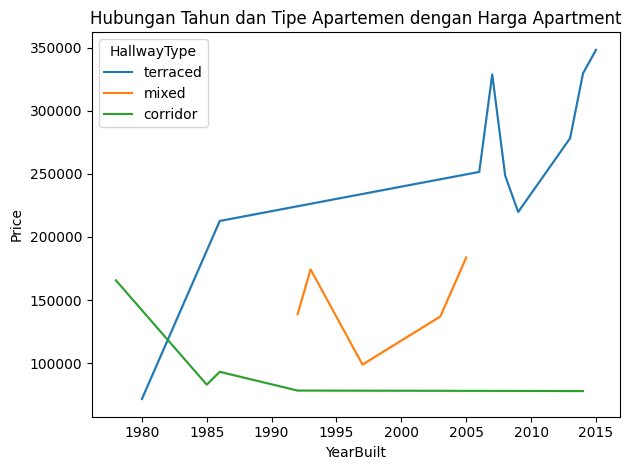

In [233]:
sns.lineplot(data=data, x='YearBuilt', y='Price',hue='HallwayType', ci=False)
plt.title('Hubungan Tahun dan Tipe Apartemen dengan Harga Apartment')
plt.tight_layout()
plt.show()

- Apartemen berteras cenderung memiliki harga yang lebih tinggi dibandingkan dengan tipe lainnya dan menunjukkan jenaikan harga yang lebih signifikan.
- Apartemen bertipe mixed cenderung lebih mahal dari pada apartemen bertipe koridor namun lebih murah juga dibanding apartemen berteras. Tipe ini juga mengalami peningkatan harga meskipun tidak seekstrim tipe berteras.
- Apartemen berkoridor mengalami penurunan harga dan memiliki harga yang paling stabil dan relatif lebuh rendah dibandingkan tipe yang lain selama periode waktu yang ditampilkan.

**Hubungan Fasilitas dan Tipe Apartemen dengan Harga Apartment**

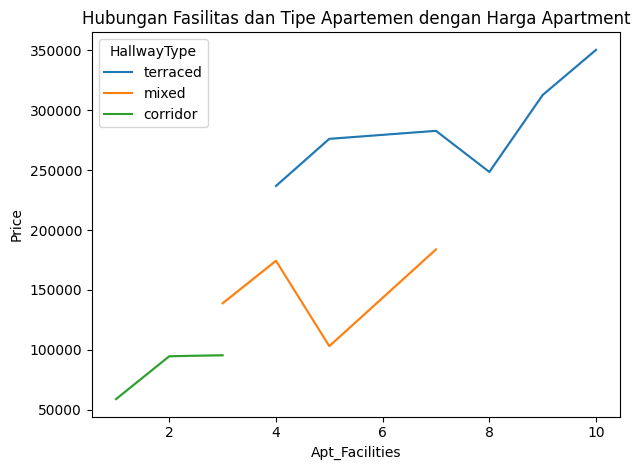

In [234]:
sns.lineplot(data=data, x='Apt_Facilities', y='Price',hue='HallwayType', ci=False)
plt.title('Hubungan Fasilitas dan Tipe Apartemen dengan Harga Apartment')
plt.tight_layout()
plt.show()

- Apartemen ber terascenderung memiliki harga yang lebih tinggi dibandingkan dengan tipe lainnya. Tipe ini juga menunjukkan kenaikan harga yang signifikan seiring dengan bertambahnya jumlah fasilitas apartemen.
- Apartemen dengan tipe mixed juga menunjukkan tren peningkatan harga seiring dengan bertambahnya jumlah fasilitas, meskipun terdapat fluktuasi.
- Apartemen berkoridor cenderung memiliki fasilitas yang lebih sedikit dibanding kedua tipe lainnya. Tipe ini juga memiliki harga yang paling stabil dan relatif lebih rendah, namun tetap menunjukkan sedikit peningkatan harga dengan bertambahnya jumlah fasilitas.

**Hubungan Tahun dan Tipe Apartemen dengan Ukuran Apartment**

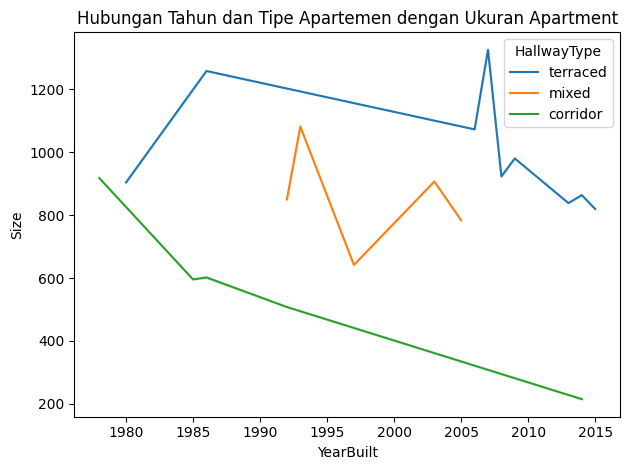

In [235]:
sns.lineplot(data=data, x='YearBuilt', y='Size',hue='HallwayType', ci=False)
plt.title('Hubungan Tahun dan Tipe Apartemen dengan Ukuran Apartment')
plt.tight_layout()
plt.show()

- Ukuran apartemen berteras cenderung lebih besar dibandingkan tipe lainnya, namun mengalami penurunan ukuran dari tahun 1985 hingga 2015 dengan pengecualian peningkatan pada tahun 2005.
- Ukuran apartemen bertipe mixed megalami fluktuasi yang signifikan, dengan ukuran tertinggi sekitar tahun 1992
- Ukuran apartemen berkoridor secara konsisten menurun dengan ukuran terkecil diantara tipe yang lainnya.

**Tren Harga Apartemen**

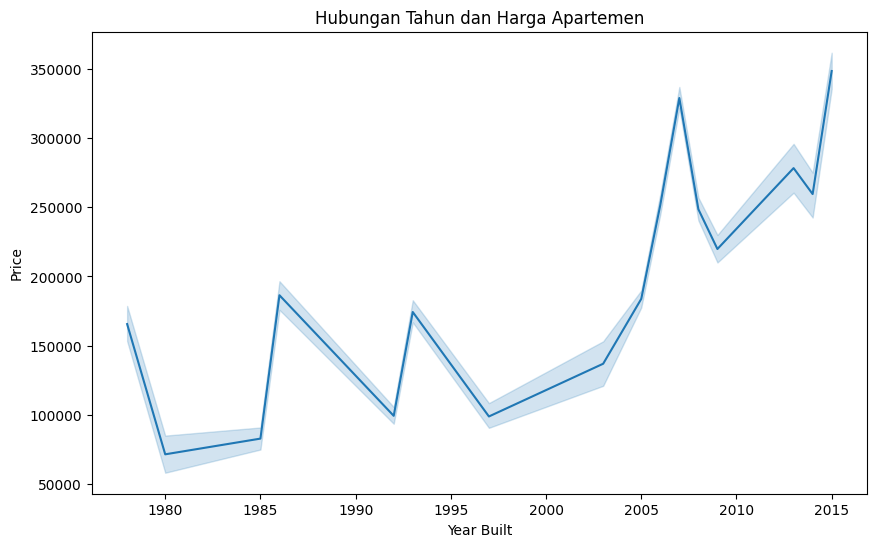

In [236]:
plt.figure(figsize=(10,6))
sns.lineplot(x='YearBuilt', y='Price', data=data)
plt.xlabel('Year Built')
plt.ylabel('Price')
plt.title('Hubungan Tahun dan Harga Apartemen')
plt.show()

- Secara umum, terlihat bahwa harga apartemen cenderung meningkat seiring waktu, meskipun ada beberapa periode penurunan yang signifikan.

In [237]:
data['TimeToSubway'].unique()

array(['0 - 5 min', '10 - 15 min', '15 - 20 min', '5 - 10 min', 'None'],
      dtype=object)

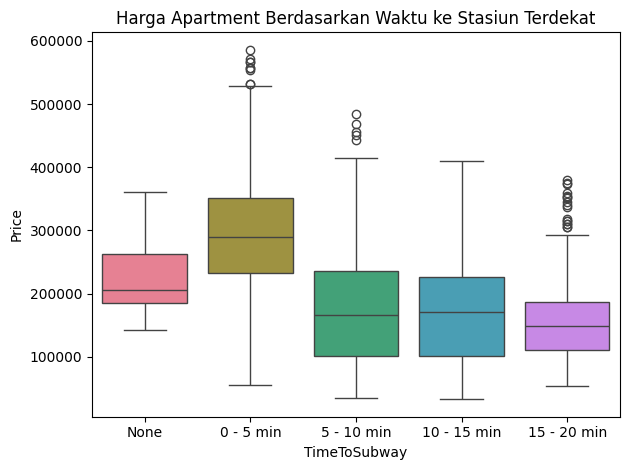

In [238]:
time = data['TimeToSubway'].value_counts()

palette = sns.color_palette("husl", len(time))
sns.boxplot(data=data, y='Price', x='TimeToSubway',
            order=['None','0 - 5 min','5 - 10 min','10 - 15 min','15 - 20 min'],
            palette=palette)
plt.title('Harga Apartment Berdasarkan Waktu ke Stasiun Terdekat')
plt.tight_layout()
plt.show()

- Apartemen yang sangat dekat dengan stasiun (0-5 menit) cenderung memiliki harga yang lebih tinggi dan lebih bervariasi dibandingkan dengan apartemen yang membutuhkan waktu lebih lama untuk mencapai stasiun.
- Apartemen yang tidak memiliki akses ke stasiun atau membutuhkan waktu lebih lama (lebih dari 5 menit) cenderung memiliki harga yang lebih rendah dan distribusi harga yang lebih sempit.

# Modelling

In [239]:
data.head(3)

,HallwayType,TimeToSubway,SubwayStation,ETC_Facilities_Nearby,Public_Office_Nearby,University_Nearby,Parking_Basement,YearBuilt,Apt_Facilities,Size,Price
0,terraced,0 - 5 min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10 - 15 min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15 - 20 min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946


## Feature Engineering

In [240]:
data.describe(include='O').T

,count,unique,top,freq
HallwayType,2701,3,terraced,1667
TimeToSubway,2701,5,0 - 5 min,1248
SubwayStation,2701,8,Myung-duk,709


- Scaling
  - Scaling merupakan metode untuk melakukan transformasi terhadap data numerik agar data antar variabel memiliki skala yang sama. Dalam dataset ini terdapat 2 fitur yang memiliki nilai rentang yang sangat jauh yaitu **Parking basement** (0-1321) dan **Size** (135-2337). Metode Scaling yang akan digunakan metode **Robust Scaling**, karena metode ini tidak sensitif terhadap outliers, dan terdapat sedikit outliers pada fitur Size.
- Encoding
  - Encoding merupakan metode yang digunakan untuk merepresentasikan variabel kategorik dalam machine learning. Dalam dataset ini, terdapat 3 fitur kategorikal yang perlu di encode datanya.
    - Fitur **HallwayType** akan di encode menggunakan **One-Hot Encoding** karena hanya memiliki 3 kategori dan merupakan variable nominal.
    - Fitur **SubwayStation** akan di encode menggunakan **Binary Encoding** karena fitur memiliki 8 kategori. Digunakan Binary Encoding karena fitur merupakan variabel nominal dan variabel dummy yang dihasilkan menjadi lebih sedikit.Fitur ini tidak menggunakan One-Hot Encoding karena variable dummy yang dihasilkan akan semakin banyak yang akan digunakan dalam model yang akan membuat model menjadi overfit.
    - Fitur **TimeToSubway** akan di encode menggunakan **Ordinal Encoding** karena fitur merupakan variabel ordinal. Fitur juga memiliki kategori yang memiliki urutan berdasarkan waktu yang dibutuhkan untuk menuju ke stasiun terdekat.

In [241]:
data.columns

Index(['HallwayType', 'TimeToSubway', 'SubwayStation', 'ETC_Facilities_Nearby',
       'Public_Office_Nearby', 'University_Nearby', 'Parking_Basement',
       'YearBuilt', 'Apt_Facilities', 'Size', 'Price'],
      dtype='object')

In [242]:
# Scaling dan Encoding

ordinal_mapping = [
    {'col':'TimeToSubway',
    'mapping':{'None':0,
               '0 - 5 min':1,
               '5 - 10 min':2,
               '10 - 15 min':3,
               '15 - 20 min':4}}]

ordinal_encoder = ce.OrdinalEncoder(cols=['TimeToSubway'], mapping=ordinal_mapping)

transformer = ColumnTransformer([
            ('RobustScaler', RobustScaler(), ['Parking_Basement', 'Size']),
            ('OneHotEncoding', OneHotEncoder(drop='first'), ['HallwayType']),
            ('BinaryEncoding', ce.BinaryEncoder(), ['SubwayStation']),
            ('OrdinalEncoding', ce.OrdinalEncoder(), ['TimeToSubway'])
            ], remainder='passthrough')

- Berdasarkan hasil korelasi, semua fitur akan digunakan dalam pembuatan model ini.

In [243]:
# Fitur dan target yang akan digunakan

X = data.drop(columns=['Price'])
y = data['Price']

In [244]:
# Splitting Data Train dan Test dengan proporsi 70:30 dengan random state default

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model

**Random Forest Regressor** : Random Forest Regressor adalah model ensemble berbasis pohon keputusan yang menggunakan banyak pohon untuk meningkatkan akurasi prediksi. Setiap pohon dalam hutan dilatih dengan subset acak dari data, dan hasil akhirnya merupakan rata-rata dari prediksi semua pohon, yang membantu mengurangi overfitting dan meningkatkan generalisasi.

**XGBoost** : XGBoost (Extreme Gradient Boosting) adalah algoritma boosting yang kuat dan efisien yang menggabungkan beberapa model lemah, biasanya pohon keputusan, untuk membentuk model yang lebih kuat. XGBoost dirancang untuk kecepatan dan performa tinggi, serta memiliki berbagai fitur seperti regularisasi yang membantu mengurangi overfitting.

**Linear Regression** : Linear Regression adalah model statistika yang digunakan untuk memprediksi nilai output kontinu berdasarkan hubungan linear antara variabel independen dan dependen. Model ini mencari garis terbaik yang meminimalkan jumlah kuadrat dari selisih antara nilai prediksi dan nilai aktual.

**Ridge Regression** : Ridge Regression adalah bentuk regularisasi dari regresi linear yang menambahkan penalti L2 terhadap besarnya koefisien untuk mengurangi kompleksitas model. Penalti ini membantu mencegah overfitting dengan menyusutkan koefisien yang tidak penting menuju nol, tetapi tidak menghilangkannya.

**Lasso Regression** : Lasso Regression adalah teknik regresi yang menggunakan penalti L1 untuk mendorong beberapa koefisien menjadi nol, sehingga menghasilkan model yang lebih sederhana dan mudah diinterpretasi. Selain mencegah overfitting, Lasso juga berguna dalam fitur seleksi.

**Support Vector Regression (SVR)** : Support Vector Regression adalah varian dari Support Vector Machines yang digunakan untuk tugas regresi. SVR berusaha menemukan hyperplane dalam ruang fitur yang memaksimalkan margin antara data dan hyperplane, sementara tetap menjaga margin toleransi kesalahan yang ditentukan untuk semua titik data.

**K-Nearest Neighbors (KNN)** : K-Nearest Neighbors adalah algoritma non-parametrik yang digunakan untuk tugas regresi dan klasifikasi. Untuk regresi, KNN memprediksi nilai target dengan mengambil rata-rata dari K tetangga terdekat dalam ruang fitur, sehingga sangat bergantung pada metrik jarak yang dipilih dan parameter K.

**Decision Tree Regressor**: Decision Tree Regressor adalah model prediktif yang menggunakan pohon keputusan untuk memetakan observasi dari data tentang target nilai yang terstruktur. Model ini membagi dataset menjadi subset yang lebih kecil dan lebih kecil dengan struktur pohon yang terdiri dari simpul keputusan dan simpul daun, di mana setiap simpul internal mewakili sebuah "tes" pada fitur dan setiap cabang mewakili hasil tes tersebut.

In [245]:
forest = RandomForestRegressor()
xgb = XGBRegressor()
linreg = LinearRegression()
ridge = Ridge()
lasso = Lasso()
svr = SVR()
tree = DecisionTreeRegressor()
knn = KNeighborsRegressor()

model = [forest, xgb, linreg, ridge, lasso, svr, tree, knn]

R2=[]
mean_R2=[]
std_R2=[]

rmse = []
mean_rmse = []
std_rmse = []

mae = []
mean_mae = []
std_mae = []

mape = []
mean_mape = []
std_mape = []

kfold=KFold(n_splits=5) # cross validation

for i in model:
    model_pipeline=Pipeline([
    ('preprocess',transformer),
    ('model',i)
    ])

    # R-Squared
    model_cv_R2 = cross_val_score(model_pipeline, X_train, y_train,
                                  cv=kfold,
                                  scoring='r2')
    R2.append(model_cv_R2)
    mean_R2.append(model_cv_R2.mean())
    std_R2.append(model_cv_R2.std())

    # RMSE
    model_cv_rmse = cross_val_score(model_pipeline, X_train, y_train,
                                    cv=kfold,
                                    scoring='neg_root_mean_squared_error')
    rmse.append(model_cv_rmse)
    mean_rmse.append(model_cv_rmse.mean())
    std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(model_pipeline, X_train, y_train,
                                   cv=kfold,
                                   scoring='neg_mean_absolute_error')
    mae.append(model_cv_mae)
    mean_mae.append(model_cv_mae.mean())
    std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(model_pipeline, X_train, y_train,
                                    cv=kfold,
                                    scoring='neg_mean_absolute_percentage_error')
    mape.append(model_cv_mape)
    mean_mape.append(model_cv_mape.mean())
    std_mape.append(model_cv_mape.std())

kfold=pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost', 'Linear Regression', 'Ridge Regression', 'Lasso Regression', 'SVR', 'Decision Tree', 'KNN Regressor'],
    'Mean R2': mean_R2,
    'Std R2': std_R2,
    'Mean RMSE': mean_rmse,
    'Std RMSE': std_rmse,
    'Mean MAE': mean_mae,
    'Std MAE': std_mae,
    'Mean MAPE': mean_mape,
    'Std MAPE': std_mape
}).set_index('Model').sort_values(by='Mean R2',ascending=False)

kfold

,Mean R2,Std R2,Mean RMSE,Std RMSE,Mean MAE,Std MAE,Mean MAPE,Std MAPE
Model,,,,,,,,
Random Forest,0.807708,0.013784,-46232.822496,959.553846,-37295.558370,977.801989,-0.190389,0.001340
Decision Tree,0.807112,0.013265,-46270.785489,884.248170,-37259.323556,955.537365,-0.190018,0.001301
XGBoost,0.806841,0.013167,-46303.875886,865.292775,-37297.524676,922.828434,-0.190406,0.001068
KNN Regressor,0.782856,0.022924,-49043.021358,2003.794166,-39232.415833,2042.377816,-0.200128,0.007823
Linear Regression,0.755169,0.010342,-52161.731578,561.053598,-42090.448273,748.236544,-0.216895,0.005181
Lasso Regression,0.755168,0.010343,-52161.801519,561.102159,-42090.970775,748.139394,-0.216901,0.005173
Ridge Regression,0.755153,0.010346,-52163.415479,562.701170,-42099.964056,747.786206,-0.217047,0.005091
SVR,-0.007083,0.005022,-105855.515131,2178.696754,-85494.536366,3745.076433,-0.559577,0.049023


Berdasarkan data evaluasi metrik yang didapatkan, model dapat dibandingkan berdasarkan nilai nilai berikut:

- **Mean R2 (R-squared)** : Menunjukkan seberapa baik model dapat menjelaskan variabilitas data. Nilai mean R2 yang mendekati 1 menunjukkan bahwa model-model tersebut dapat menjelaskan sebagian besar variasi dalam data.
  - **Random Forest** memiliki nilai mean R2 tertinggi, diikuti oleh **Decision Tree** dan **XGBoost**.

- **Mean RMSE (Root Mean Square Error)** : Menilai rata-rata kesalahan prediksi model. Nilai yang lebih rendah menunjukkan kesalahan yang lebih kecil dan performa yang lebih baik dan lebih akurat
  - **Random Forest** memiliki nilai mean RMSE terendah, diikuti oleh **Decision Tree** dan **XGBoost**.

- **Mean MAE (Mean Absolute Error)** : Merupakan metrik yang menilai rata-rata kesalahan absolut dalam prediksi. Sama seperti RMSE, nilai yang lebih rendah menunjukkan performa yang lebih baik menandakan rata-rata kesalahan prediksi yang lebih kecil.
  - **Random Forest** memiliki nilai mean MAE terendah, diikuti oleh **Decision Tree** dan **XGBoost**.

- **Mean MAPE (Mean Absolute Percentage Error)** : Menilai rata-rata kesalahan absolut dalam bentuk persentase. Nilai yang lebih rendah menunjukkan ketepatan yang lebih tinggi.
  - **Decision Tree** memiliki nilai mean MAPE terendah, diikuti oleh **Random Forest** dan **XGBoost**. MAPE yang lebih rendah menunjukkan persentase kesalahan prediksi yang lebih kecil.

- **Perbandingan Antar Model**
  - **Model berbasis tree (Random Forest, Decision Tree, dan XGBoost)** secara konsisten **mengungguli** model lainnya dalam semua metrik.
  - **KNN** berada di peringkat tengah, sementara model **regresi linear**, **Lasso**, dan **Ridge** menunjukkan performa yang hampir sama.
  - **SVR** memiliki performa **terburuk** dengan nilai R2 negatif dan nilai error tertinggi untuk semua metrik.

**Prediksi pada data test menggunakan model Random Forest, Decision Tree dan XGBoost**

In [246]:
# 3 Model Terbaik
models = {
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'XGBoost': XGBRegressor()
    }

test_metrics = {
    'Model': [],
    'Test R2': [],
    'Test RMSE': [],
    'Test MAE': [],
    'Test MAPE': []
    }

for model_name, model in models.items():
    model_pipeline = Pipeline([
        ('preprocess', transformer),
        ('model', model)
    ])

    model_pipeline.fit(X_train, y_train)

    y_pred = model_pipeline.predict(X_test)

    test_r2 = r2_score(y_test, y_pred)
    test_rmse = mean_squared_error(y_test, y_pred, squared=False)
    test_mae = mean_absolute_error(y_test, y_pred)
    test_mape = mean_absolute_percentage_error(y_test, y_pred)

    test_metrics['Model'].append(model_name)
    test_metrics['Test R2'].append(test_r2)
    test_metrics['Test RMSE'].append(test_rmse)
    test_metrics['Test MAE'].append(test_mae)
    test_metrics['Test MAPE'].append(test_mape)

# Hasil dalam bentuk dataframe
test_metrics_df = pd.DataFrame(test_metrics).set_index('Model')
test_metrics_before_tuning = test_metrics_df.sort_values(by='Test R2', ascending=False)
test_metrics_before_tuning

,Test R2,Test RMSE,Test MAE,Test MAPE
Model,,,,
Random Forest,0.783420,47965.312352,38929.266181,0.198900
XGBoost,0.783239,47985.303133,38951.314197,0.198598
Decision Tree,0.777945,48567.770869,39156.598891,0.201903


- Ketika model diterapkan pada data test, model **Random Forest** masih lebih unggul dibandingkan dengan **XGBoost** dan **Decision Tree** berdasarkan nilai R2, RMSE, MAE dan MAPE.
- **XGBoost** dan **Decision Tree** memiliki performa yang hampir sama pada data uji, dengan **XGBoost sedikit lebih baik dibandingkan Decision Tree**.
- **Decision Tree** memiliki **kinerja terendah** di antara ketiga model pada data uji, dengan nilai R2 terendah dan metrik kesalahan yang sedikit lebih tinggi.

## **Hyperparameter tuning**

Hyperparameter tuning merupakan proses penting dalam pengembangan model machine learning yang bertujuan untuk menemukan kombinasi hyperparameter yang optimal untuk model tertentu. Hyperparameter adalah parameter yang tidak dipelajari dari data selama pelatihan model, melainkan ditentukan sebelum proses pelatihan dimulai. Tuning hyperparameter dapat secara signifikan mempengaruhi kinerja model.

Oleh karena itu, kedua model yang terpilih akan dilakukan hyperparameter tuning untuk dapat meningkatkan performa model dan pada akhirnya memilih model final yang terbaik.

### **Random Forest**

**Random Forest** adalah teknik ensemble yang menggabungkan beberapa model Decision Tree dengan karakteristik data yang bervariasi, bertujuan untuk mengurangi variabilitas nilai prediksi dan membuat hasil prediksi lebih konsisten. Prediksi akhir dihasilkan dari pemilihan mayoritas (majority vote) dari semua pohon. Dalam Random Forest, fitur yang akan digunakan untuk pemecahan setiap pohon dipilih secara acak dari kandidat yang tersedia.

Berikut adalah parameter yang akan digunakan pada saat melakukan hyperparameter tuning model Random Forest:

- **n_estimators** : Jumlah pohon (trees) dalam model Random Forest. Ini adalah jumlah total estimator yang akan digunakan oleh model. Value yang akan digunakan dalam tuning ini adalah 1 sampai 1000.
- **max_depth** : Kedalaman maksimum pohon. Jika tidak ditentukan, simpul-simpul akan diperluas sampai semua daun menjadi murni atau sampai setiap daun mengandung sampel yang kurang dari min_samples_split. Max_depth yang akan digunakan dalam tuning ini adalah 1 sampai 50.
- **min_samples_split** : Jumlah minimum sampel yang diperlukan untuk memisahkan internal node.Semakin besar nilai min_samples_leaf, semakin sedikit juga pembagian node, sehingga mengurangi kemungkinan overfitting. Namun, jika nilainya terlalu besar, dapat menyebabkan underfitting. Nilai yang akan digunakan adalah 2 sampai 20.
- **min_samples_leaf** : Jumlah sampel minimum yang diperlukan untuk berada di sebuah simpul daun. Semakin besar nilai min_samples_leaf, semakin sedikit juga pembagian node, sehingga mengurangi kemungkinan overfitting. Namun, jika nilainya terlalu besar, dapat menyebabkan underfitting. Value yang akan digunakan dalam tuning ini adalah 1 sampai 20.
- **max_features** : Jumlah fitur yang dipertimbangkan untuk membagi node. Valua yang akan digunakan adalah 'auto' (semua fitur), 'sqrt' (akar kuadrat dari jumlah total fitur), dan 'log2' (logaritma dasar 2 dari jumlah total fitur).

In [269]:
# Define parameter random pada model Random Forest
rf_param_random = {
    'model__n_estimators': list(np.arange(1,1001)),
    'model__max_depth': [None, np.arange(1,51)],
    'model__min_samples_split': list(np.arange(2,21)),
    'model__min_samples_leaf': list(np.arange(1,21)),
    'model__max_features': ['auto', 'sqrt', 'log2', None]
}

**Randomized Search CV (Cross-Validation)** adalah metode dalam machine learning yang bertujuan untuk menemukan kombinasi optimal dari hyperparameter yang memberikan kinerja model terbaik. Tidak seperti **Grid Search** yang secara menyeluruh menguji semua kemungkinan kombinasi hyperparameter, **Randomized Search CV** memilih kombinasi hyperparameter secara acak dari ruang pencarian yang telah ditentukan, dan mengevaluasi kinerja model menggunakan cross-validation.

**Randomized Search CV** sangat efisien dalam hal waktu komputasi dan sumber daya, terutama ketika ruang hyperparameter sangat besar. Dengan melakukan pencarian acak, **Randomized Search CV** dapat menemukan kombinasi hyperparameter yang mendekati optimal dengan menguji sejumlah iterasi yang ditentukan sebelumnya. Hal ini memungkinkan untuk mendapatkan solusi yang baik dengan lebih cepat dibandingkan **Grid Search**, meskipun tidak menjamin.

In [270]:
# Benchmark model
rf = RandomForestRegressor()

rf_pipeline = Pipeline([
    ('preprocess', transformer),
    ('model', rf)
])

# Random Search CV untuk Random Forest
rf_random_search = RandomizedSearchCV(
    estimator=rf_pipeline, # Model yang akan dituning
    param_distributions=rf_param_random,
    cv=5, # Cross Validation
    scoring=['r2', 'neg_root_mean_squared_error',
             'neg_mean_absolute_error',
             'neg_mean_absolute_percentage_error'],
    n_jobs=-1,
    refit='neg_mean_absolute_percentage_error',
    random_state=1)

# Fit model dengan hyperparameter tuning pada data train
rf_random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('RobustScaler',
                                                                               RobustScaler(),
                                                                               ['Parking_Basement',
                                                                                'Size']),
                                                                              ('OneHotEncoding',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['HallwayType']),
                                                                              ('BinaryEncoding',
                                                                               BinaryEncoder(),
                                                                               ['SubwayStation']),
                                                                              ('OrdinalEncoding',
                                                                               OrdinalEncoder(),
                                                                               ['TimeToSubway'])]...
                                        'model__min_samples_split': [2, 3, 4, 5,
                                                                     6, 7, 8, 9,
                                                                     10, 11, 12,
                                                                     13, 14, 15,
                                                                     16, 17, 18,
                                                                     19, 20],
                                        'model__n_estimators': [1, 2, 3, 4, 5,
                                                                6, 7, 8, 9, 10,
                                                                11, 12, 13, 14,
                                                                15, 16, 17, 18,
                                                                19, 20, 21, 22,
                                                                23, 24, 25, 26,
                                                                27, 28, 29, 30, ...]},
                   random_state=1, refit='neg_mean_absolute_percentage_error',
                   scoring=['r2', 'neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [271]:
# Melihat hasil tuning dalam bentuk dataframe.
pd.DataFrame(rf_random_search.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error',
                                                           'rank_test_neg_mean_absolute_error',
                                                           'rank_test_neg_mean_absolute_percentage_error'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_estimators,param_model__min_samples_split,param_model__min_samples_leaf,param_model__max_features,param_model__max_depth,params,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
7,0.757140,0.061509,0.041335,0.005026,160,9,2,None,None,"{'model__n_estimators': 160, 'model__min_sampl...",...,1029.084095,1,-0.189325,-0.193637,-0.194197,-0.191529,-0.195610,-0.192860,0.002201,1
9,2.196980,0.367169,0.119823,0.019102,826,16,2,sqrt,None,"{'model__n_estimators': 826, 'model__min_sampl...",...,1205.466681,2,-0.187866,-0.195886,-0.197645,-0.192773,-0.194446,-0.193723,0.003340,2
4,2.356994,0.298586,0.125872,0.030231,490,2,5,log2,None,"{'model__n_estimators': 490, 'model__min_sampl...",...,1217.350044,3,-0.188155,-0.199818,-0.200561,-0.195694,-0.197003,-0.196246,0.004421,3
1,2.151481,0.027722,0.118170,0.005352,756,18,6,sqrt,None,"{'model__n_estimators': 756, 'model__min_sampl...",...,1245.767909,4,-0.188116,-0.201844,-0.201410,-0.196215,-0.197734,-0.197064,0.004959,4
3,0.769242,0.005691,0.050847,0.001312,264,18,6,sqrt,None,"{'model__n_estimators': 264, 'model__min_sampl...",...,1274.267710,5,-0.188259,-0.202298,-0.202049,-0.196408,-0.197606,-0.197324,0.005102,5
0,0.045621,0.003243,0.000000,0.000000,38,16,7,auto,None,"{'model__n_estimators': 38, 'model__min_sample...",...,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
2,0.044128,0.001250,0.000000,0.000000,77,5,16,log2,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'model__n_estimators': 77, 'model__min_sample...",...,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
5,0.077676,0.008226,0.000000,0.000000,556,19,10,log2,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'model__n_estimators': 556, 'model__min_sampl...",...,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
6,0.061285,0.010594,0.000000,0.000000,350,18,4,auto,None,"{'model__n_estimators': 350, 'model__min_sampl...",...,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
8,0.040186,0.000946,0.000000,0.000000,673,10,3,log2,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'model__n_estimators': 673, 'model__min_sampl...",...,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6


In [272]:
# Cek score dan parameter terbaik
print('Random Forest')
print('Nilai MAPE setelah dilakukan hyperparameter tuning adalah', rf_random_search.best_score_)
rf_random_search.best_params_

Random Forest
Nilai MAPE setelah dilakukan hyperparameter tuning adalah -0.1928598071448353


{'model__n_estimators': 160,
 'model__min_samples_split': 9,
 'model__min_samples_leaf': 2,
 'model__max_features': None,
 'model__max_depth': None}

**Prediksi pada data test menggunakan model Random Forest yang telah di tuning**

In [273]:
# Model Random Forest terbaik
best_rf_model = rf_random_search.best_estimator_

# Prediksi pada data test menggunakan model Random Forest terbaik
y_pred_rf_tuned = best_rf_model.predict(X_test)

# Menyimpan nilai metrics setelah dituning
rf_test_r2 = r2_score(y_test, y_pred_rf_tuned)
rf_test_rmse = mean_squared_error(y_test, y_pred_rf_tuned, squared=False)
rf_test_mae = mean_absolute_error(y_test, y_pred_rf_tuned)
rf_test_mape = mean_absolute_percentage_error(y_test, y_pred_rf_tuned)

rf_tuned_metrics = pd.DataFrame({
    'Model': ['Random Forest'],
    'Tuned Test R2': [rf_test_r2],
    'Tuned Test RMSE': [rf_test_rmse],
    'Tuned Test MAE': [rf_test_mae],
    'Tuned Test MAPE': [rf_test_mape]
}).set_index('Model')

print("Random Forest metrics after tuning:")
display(rf_tuned_metrics)


Random Forest metrics after tuning:


,Tuned Test R2,Tuned Test RMSE,Tuned Test MAE,Tuned Test MAPE
Model,,,,
Random Forest,0.784564,47838.45505,38735.30816,0.198424


### **XGBoost**

XGBoost (Extreme Gradient Boosting) adalah algoritma pembelajaran mesin yang sangat efisien dan kuat untuk tugas regresi dan klasifikasi. XGBoost membangun model-model lemah secara bertahap, memperbaiki kesalahan model sebelumnya untuk meningkatkan akurasi keseluruhan. XGBoost juga memiliki built-in regularisasi untuk mencegah overfitting dan mampu menangani data yang hilang secara langsung.

Berikut adalah parameter yang akan digunakan pada saat melakukan hyperparameter tuning model Random Forest:

- **n_estimators** : Jumlah pohon (trees) dalam model XGBoost. Ini adalah jumlah total estimator yang akan digunakan oleh model. Nilai yang lebih tinggi umumnya meningkatkan performa model, tetapi juga meningkatkan kompleksitas dan waktu pelatihan. Nilai yang akan digunakan dalam tuning ini adalah 100 sampai 200.
- **learning_rate** :  learning_rate mengontrol ukuran langkah pembaruan yang dilakukan untuk mengurangi kesalahan setiap kali model belajar. Nilai yang lebih kecil membuat pembelajaran lebih lambat namun lebih stabil, sedangkan nilai yang lebih besar mempercepat pembelajaran namun berisiko kehilangan optimalitas. Nilai yang akan digunakan dalam tuning ini adalah 0.01 sampai 0.99 dengan kenaikan 0.01
- **max_depth** : Kedalaman maksimum pohon menentukan sejauh mana pohon dapat tumbuh. Nilai yang lebih besar memungkinkan model menangkap lebih banyak variasi dalam data tetapi juga meningkatkan risiko overfitting. Nilai 0 berarti tidak ada batasan pada kedalaman pohon. Nilai yang digunakan dalam tuning ini adalah 1 sampai 10.
- **subsample** : Parameter subsample menentukan proporsi sampel data pelatihan yang akan digunakan untuk membangun setiap pohon. Nilai yang lebih kecil membantu mencegah overfitting dengan memperkenalkan variasi acak ke dalam proses pelatihan, sementara nilai yang lebih besar menggunakan lebih banyak data untuk setiap pohon, yang dapat meningkatkan stabilitas model. Nilai yang digunakan dalam tuning ini adalah 0.2 sampai 0.9 dengan kenaikan 0.1
- **colsample_bytree** : Parameter ini  menentukan proporsi fitur yang akan dipilih secara acak dan digunakan untuk membangun setiap pohon. Mirip dengan subsample, nilai yang lebih kecil membantu mencegah overfitting dengan memperkenalkan variasi acak, sementara nilai yang lebih besar menggunakan lebih banyak fitur, yang dapat meningkatkan kekuatan prediksi model. Nilai yang digunakan dalam tuning ini adalah 0.1 sampai 0.9 dengan kenaikan 0.1

In [274]:
# Define parameter grid pada model XGBoost
xgb_param_random = {
    'model__n_estimators': list(np.arange(50, 501)),
    'model__learning_rate': list(np.arange(1, 100)/100),
    'model__max_depth': list(np.arange(1, 11)),
    'model__subsample': list(np.arange(2, 10)/10),
    'model__colsample_bytree': list(np.arange(1, 10)/10)
}

In [275]:
# Benchmark model
xgb = XGBRegressor()

xgb_pipeline = Pipeline([
    ('preprocess', transformer),
    ('model', xgb)
])

# RandomSearchCV untuk XGBoost
xgb_random_search = RandomizedSearchCV(
    estimator=xgb_pipeline,
    param_distributions=xgb_param_random,
    cv=5,
    scoring=['r2', 'neg_root_mean_squared_error',
             'neg_mean_absolute_error',
             'neg_mean_absolute_percentage_error'],
    n_jobs=-1,
    refit='neg_mean_absolute_percentage_error',
    random_state=1)

# # Fit model dengan hyperparameter tuning pada data train
xgb_random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('RobustScaler',
                                                                               RobustScaler(),
                                                                               ['Parking_Basement',
                                                                                'Size']),
                                                                              ('OneHotEncoding',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['HallwayType']),
                                                                              ('BinaryEncoding',
                                                                               BinaryEncoder(),
                                                                               ['SubwayStation']),
                                                                              ('OrdinalEncoding',
                                                                               OrdinalEncoder(),
                                                                               ['TimeToSubway'])]...
                                        'model__max_depth': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'model__n_estimators': [50, 51, 52, 53,
                                                                54, 55, 56, 57,
                                                                58, 59, 60, 61,
                                                                62, 63, 64, 65,
                                                                66, 67, 68, 69,
                                                                70, 71, 72, 73,
                                                                74, 75, 76, 77,
                                                                78, 79, ...],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=1, refit='neg_mean_absolute_percentage_error',
                   scoring=['r2', 'neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [276]:
# Melihat hasil tuning dalam bentuk dataframe.
pd.DataFrame(xgb_random_search.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error',
                                                           'rank_test_neg_mean_absolute_error',
                                                           'rank_test_neg_mean_absolute_percentage_error'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__colsample_bytree,params,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
7,0.485664,0.005785,0.034184,0.000945,0.7,427,8,0.24,0.9,"{'model__subsample': 0.7, 'model__n_estimators...",...,883.089900,1,-0.189990,-0.189784,-0.189116,-0.188873,-0.192660,-0.190085,0.001352,1
1,0.755647,0.061069,0.068160,0.007568,0.5,411,9,0.01,0.7,"{'model__subsample': 0.5, 'model__n_estimators...",...,1076.376390,4,-0.189262,-0.197148,-0.195874,-0.194535,-0.196895,-0.194743,0.002891,8
0,0.258194,0.033244,0.025540,0.001913,0.7,496,3,0.56,0.4,"{'model__subsample': 0.7, 'model__n_estimators...",...,1134.536382,2,-0.187547,-0.189801,-0.194242,-0.190459,-0.192356,-0.190881,0.002278,3
8,0.223217,0.010807,0.026324,0.000812,0.9,149,9,0.37,0.8,"{'model__subsample': 0.9, 'model__n_estimators...",...,828.397344,3,-0.189172,-0.189410,-0.190269,-0.192631,-0.192192,-0.190735,0.001424,2
6,0.399219,0.082127,0.030100,0.000410,0.5,363,7,0.56,0.7,"{'model__subsample': 0.5, 'model__n_estimators...",...,872.400226,6,-0.193407,-0.192781,-0.189917,-0.194756,-0.193512,-0.192875,0.001612,6
2,0.209982,0.031801,0.048978,0.016020,0.6,173,5,0.89,0.2,"{'model__subsample': 0.6, 'model__n_estimators...",...,842.630291,5,-0.188044,-0.188731,-0.190091,-0.193136,-0.197140,-0.191428,0.003348,5
3,0.318321,0.036085,0.056137,0.006007,0.2,179,7,0.45,0.4,"{'model__subsample': 0.2, 'model__n_estimators...",...,805.522185,7,-0.184732,-0.190598,-0.185706,-0.194720,-0.198826,-0.190916,0.005339,4
5,0.438565,0.006028,0.053791,0.007858,0.3,206,10,0.75,0.4,"{'model__subsample': 0.3, 'model__n_estimators...",...,1289.399617,8,-0.188933,-0.197339,-0.193512,-0.196671,-0.191768,-0.193644,0.003116,7
4,0.204981,0.004442,0.046977,0.005078,0.9,121,7,0.14,0.1,"{'model__subsample': 0.9, 'model__n_estimators...",...,1528.457559,9,-0.194048,-0.217424,-0.209662,-0.212326,-0.212936,-0.209279,0.008014,9
9,0.107306,0.008703,0.020504,0.003310,0.2,194,1,0.07,0.3,"{'model__subsample': 0.2, 'model__n_estimators...",...,1307.504507,10,-0.198641,-0.216179,-0.211836,-0.213452,-0.208922,-0.209806,0.006058,10


In [277]:
# Cek score dan parameter terbaik
print('XGBoost')
print('Best Score', round(rf_random_search.best_score_, 4))
rf_random_search.best_params_

XGBoost
Best Score -0.1929


{'model__n_estimators': 160,
 'model__min_samples_split': 9,
 'model__min_samples_leaf': 2,
 'model__max_features': None,
 'model__max_depth': None}

**Prediksi pada data test menggunakan model XGBoost yang telah di tuning**

In [278]:
# Model XGBoost terbaik
best_xgb_model = xgb_random_search.best_estimator_

# Prediksi pada data test menggunakan model XGBoost terbaik
y_pred_xgb_tuned = best_xgb_model.predict(X_test)

# Menyimpan nilai metrics setelah dituning
xgb_test_r2 = r2_score(y_test, y_pred_xgb_tuned)
xgb_test_rmse = mean_squared_error(y_test, y_pred_xgb_tuned, squared=False)
xgb_test_mae = mean_absolute_error(y_test, y_pred_xgb_tuned)
xgb_test_mape = mean_absolute_percentage_error(y_test, y_pred_xgb_tuned)

xgb_tuned_metrics = pd.DataFrame({
    'Model': ['XGBoost'],
    'Tuned Test R2': [xgb_test_r2],
    'Tuned Test RMSE': [xgb_test_rmse],
    'Tuned Test MAE': [xgb_test_mae],
    'Tuned Test MAPE': [xgb_test_mape]
}).set_index('Model')

print("XGBoost metrics after tuning:")
display(xgb_tuned_metrics)


XGBoost metrics after tuning:


,Tuned Test R2,Tuned Test RMSE,Tuned Test MAE,Tuned Test MAPE
Model,,,,
XGBoost,0.783655,47939.20904,38981.681796,0.198747


## **Perbandingan Performa model**

**Random Forest**

In [279]:
# Sebelum Hyperparameter Tuning
pd.DataFrame(test_metrics_before_tuning.loc['Random Forest']).T

,Test R2,Test RMSE,Test MAE,Test MAPE
Random Forest,0.78342,47965.312352,38929.266181,0.1989


In [280]:
# Sesudah Hyperparameter Tuning
pd.DataFrame(rf_tuned_metrics)

,Tuned Test R2,Tuned Test RMSE,Tuned Test MAE,Tuned Test MAPE
Model,,,,
Random Forest,0.784564,47838.45505,38735.30816,0.198424


**XGBoost**

In [281]:
# Sebelum Hyperparameter Tuning
pd.DataFrame(test_metrics_before_tuning.loc['XGBoost']).T

,Test R2,Test RMSE,Test MAE,Test MAPE
XGBoost,0.783239,47985.303133,38951.314197,0.198598


In [282]:
# Sesudah Hyperparameter Tuning
pd.DataFrame(xgb_tuned_metrics)

,Tuned Test R2,Tuned Test RMSE,Tuned Test MAE,Tuned Test MAPE
Model,,,,
XGBoost,0.783655,47939.20904,38981.681796,0.198747


- **Random Forest** :
  - **R2 Score** meningkat dari 0.78342 menjadi 0.784564 setelah tuning, menunjukkan bahwa model menjadi sedikit lebih baik dalam menjelaskan variabilitas data.
  - **RMSE** berkurang dari 47965.312352 menjadi 47838.45505, menunjukkan penurunan kesalahan kuadrat rata-rata dan peningkatan akurasi prediksi.
  - **MAE** berkurang dari 38929.266181 menjadi 38735.30816, menunjukkan penurunan kesalahan absolut rata-rata.
  - **MAPE** berkurang dari 0.1989 menjadi 0.198424, menunjukkan penurunan kesalahan persentase absolut rata-rata.

- **XGBoost**:
  - **R2 Score** meningkat dari 0.783239 menjadi 0.783655 setelah tuning, menunjukkan sedikit peningkatan dalam kemampuan model menjelaskan variabilitas data.
  - **RMSE** berkurang dari 47985.303133 menjadi 47939.20904, menunjukkan penurunan kesalahan kuadrat rata-rata.
  - **MAE** berkurang dari 38951.314197 menjadi 38981.681796, menunjukkan sedikit penurunan kesalahan absolut rata-rata.
  - **MAPE** berkurang dari 0.198598 menjadi 0.198747, menunjukkan penurunan kesalahan persentase absolut rata-rata.

- **Perbandingan Performa Model** :
Setelah dilakukan hyperparameter tuning, kedua model menunjukkan peningkatan dalam semua metrik evaluasi. Namun, jika dilihat secara kuantitatif, **Random Forest sedikit lebih baik daripada XGBoost** dalam beberapa metrik utama. Misalnya, peningkatan R2 Score pada Random Forest lebih signifikan (0.001144) dibandingkan dengan XGBoost (0.000416), dan penurunan RMSE pada Random Forest (126.857302) juga lebih besar dibandingkan dengan XGBoost (46.094093). Oleh karena itu, **Random Forest dapat dianggap sebagai model yang lebih baik** di antara keduanya berdasarkan metrik evaluasi ini setelah tuning.

**Actual vs Prediction Price**

Berdasarkan hasil hyperparameter tuning yang menunjukkan bahwa model Random Forest memberikan performa sedikit lebih baik dibandingkan XGBoost, Model Random Forest akan dipilih sebagai model final. Selanjutnya, Model Random Forest yang telah dioptimalkan akan digunakan untuk memprediksi harga aktual dan harga prediksi nya.

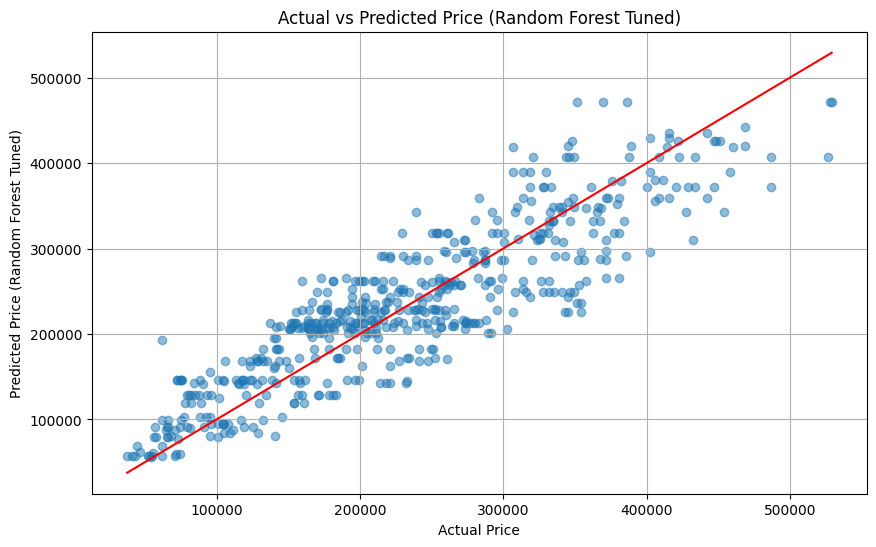

In [261]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf_tuned, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price (Random Forest Tuned)")
plt.title("Actual vs Predicted Price (Random Forest Tuned)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line for reference
plt.grid(True)
plt.show()

**Kriteria MAPE untuk Evaluasi Performa Model**

| **MAPE** | **Forecasting Interpretation** |
| --- | --- |
| < 10% | Highly accurate forecasting |
| 10% - 20% | Good forecasting |
| 20% - 50% | Reasonable forecasting |
| > 50% | Weak and inaccurate forecasting |
Source : Lewis (1982) & Hsu et al. (2008)

Hasil dari model **Random Forest** setelah dilakukan tuning menunjukkan MAPE sebesar 19.84%. Berdasarkan kriteria MAPE untuk evaluasi model, nilai MAPE ini tergolong dalam kategori **"Good Forecasting"** yang memiliki rentang 10% - 20%. Hal ini dapat mencerminkan bahwa model **Random Forest dapat memberikan hasil yang cukup baik berdasarkan Interpretasi Forecasting**.

**Referensi**

Lewis, C. D. (1982). Industrial and business forecasting methods: A practical guide to exponential smoothing and curve fitting.

Hsu, L. C., & Wang, C. H. (2008). Applied multivariate forecasting model to tourism industry. Tourism: An International Interdisciplinary Journal, 56(2), 159-172.



## **Feature Importance**

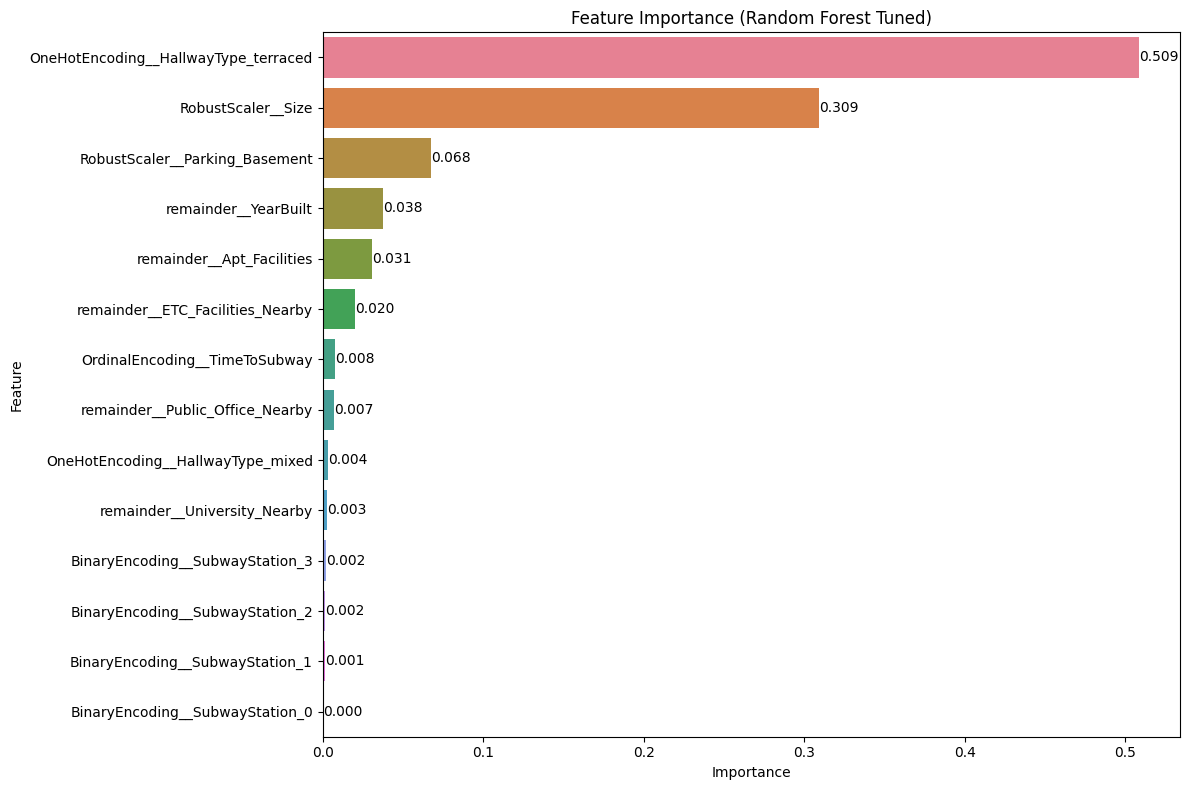

In [262]:
# Get feature importances from the best XGBoost model
feature_importances = best_rf_model.named_steps['model'].feature_importances_

# Get feature names after transformation
feature_names = best_rf_model.named_steps['preprocess'].get_feature_names_out()

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
plot = sns.barplot(x='Importance', y='Feature', data=importance_df, palette='husl')

# Add labels to the bars
for index, value in enumerate(importance_df['Importance']):
    plot.text(value, index, f'{value:.3f}', color='black', ha="left", va="center")

plt.title('Feature Importance (Random Forest Tuned)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

- Apartemen berteras dan ukuran apartemen merupakan 2 faktor paling signifikan yang mempengaruhi harga apartemen di Daegu.
- Keberadaan parkir basemnet, tahun dibagun, dan fasilitas internal apartemen memberikan kontribusi moderat, yang artinya fasilitas dan kondisi bangunan juga penting meskipun tidak sebesar ukuran dan tipe apartemen.
- Fasilitas di sekitar apartemen dan waktu ke stasiun memiliki pengaruh kecil sementara keberadaan universitas dan subway terdekat memiliki pengaruh yang sangat kecil bahkan hampir tidak signifikan.

# **Kesimpulan**

Berdasarkan hasil dari proses pemodelan yang telah dilakukan menggunakan model Random Forest yang telah dioptimisasi parameternya (Hyperparameter Tuning), menunjukan bahwa:

- Fitur 'HallwayType' bertipe 'terraced' menjadi fitur yang paling berpengaruh terhadap 'price'. Hal ini menunjukkan pengaruh yang signifikan terhadap harga apartemen di Daegu. Sementara itu, fasilitas di sekitar apartemen, fasilitas internal, dan keberadaan parkir basement juga memberikan kontribusi terhadap harga, meskipun pengaruhnya tidak sebesar tipe koridor/apartemen. Fitur-fitur lain, seperti jarak ke stasiun subway, keberadaan universitas di dekat apartemen, dan stasiun subway lainnya, memiliki dampak yang relatif kecil atau bahkan tidak berkontribusi signifikan terhadap prediksi harga.

- Metrik evaluasi yang digunakan pada model meliputi nilai R2, RMSE, MAE, dan MAPE. Berdasarkan nilai MAPE yang dihasilkan setelah tuning hyperparameter, yaitu sekitar 19.84%, dapat disimpulkan bahwa apabila model ini digunakan untuk memperkirakan harga apartemen di Daegu dalam rentang harga yang serupa dengan data pelatihan (maksimal harga 585,840 Won), maka estimasi harga rata-rata akan meleset sekitar 19.84% dari harga sebenarnya.

- Meskipun model Random Forest telah dioptimalkan dengan hyperparameter tuning, masih terdapat potensi bias yang dapat mempengaruhi akurasi prediksi harga apartemen. Bias ini sebagian besar disebabkan oleh keterbatasan fitur yang tersedia dalam dataset. Bias yang dihasilkan oleh model ini dikarenakan oleh terbatasnya fitur pada dataset yang bisa merepresentasikan aspek properti dan juga services.

- Adapun jenis faktor lain yang dapat dipertimbangkan adalah jarak apartement dengan tempat pendidikan berbagai jenjang selain universitas seperti primary school (초등학교), middle school (중학교), high school (고등학교). Fasilitas lain yang tidak kalah penting adalah jarak terhadap tempat penitipan anak (어린이집) atau playgroup. Selain itu,  jumlah total rumah tangga yang sudah tinggal di kompleks apartemen, jenis tipe pemanas ruangan yang tersedia (individual atau tersentralisasi), informasi mengenai letak lantai apartemen, dan lebar jalan masuk utama kompleks apartemen juga dapat mempengaruhi harga jual apartement di Daegu, Korea Selatan (Jang el. al., 2020).

*Source:* Jang, M. H., & Kim, H. S. (2020). Analysis on Factors Affecting Apartment Price Using Spatial Econometrics Model: Focused on Suseong-gu, Daegu. Journal of the Korean Housing Association, 31(1), 79-86.


# **Recommendation**


Untuk meningkatkan kinerja model dan memperoleh hasil prediksi yang lebih akurat, kami menyarankan beberapa langkah berikut:

1. **Penambahan Fitur yang Lebih Korelatif dengan Target:**
Menambahkan fitur yang memiliki korelasi tinggi dengan target ('SalePrice'), seperti letak lantai dan jenis penghangat dan pendingin ruangan, dapat meningkatkan kemampuan model dalam memprediksi harga apartemen. Selain itu, memperbarui dataset dengan data terkini dari apartemen di kota Daegu akan meningkatkan kapasitas prediksi model.

2. **Penggunaan Model Deep Learning yang Lebih Kompleks:**
Dengan penambahan data yang signifikan, model deep learning yang lebih kompleks, seperti Convolutional Neural Networks (CNN) atau Long Short-Term Memory (LSTM), dapat dieksplorasi. Namun, jika jumlah data dan fitur tetap seperti dataset saat ini, kompleksitas tambahan mungkin tidak memberikan peningkatan hasil yang signifikan.

3. **Penggunaan Teknik Ensemble:** Menggabungkan hasil dari beberapa model dengan teknik ensemble, seperti stacking atau boosting, dapat meningkatkan akurasi prediksi. Metode ini memanfaatkan kekuatan dari berbagai model untuk menghasilkan hasil yang lebih robust dan andal.

4. **Optimisasi Hyperparameter:**
Menggunakan teknik optimisasi hyperparameter, seperti Bayesian Optimization, untuk model yang ada (misalnya, XGBoost atau Random Forest) dapat membantu menemukan kombinasi parameter yang optimal, sehingga meningkatkan kinerja model secara keseluruhan.

# **Save Model**

In [263]:
estimator = Pipeline([('preprocess', transformer), ('model', RandomForestRegressor())])
estimator.fit(X_train, y_train)

pickle.dump(estimator, open('Daegu_Apartment_Random Forest.sav', 'wb'))

In [264]:
# Load model
filename = 'Daegu_Apartment_Random Forest.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [265]:
mean_absolute_percentage_error(y_test,loaded_model.predict(X_test))

0.19956851510602144

In [266]:
np.sqrt(mean_squared_error(y_test, loaded_model.predict(X_test)))

48039.71274483249